### tutorial 5


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(z):
 return np.maximum(0, z)

In [3]:
x=np.linspace(-5,5,50)
z=relu(x)


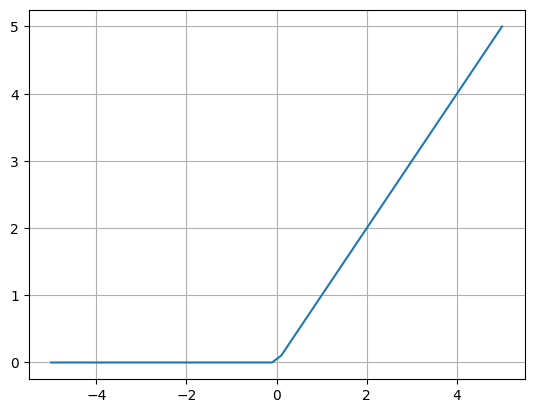

In [4]:
plt.plot(x,z)
plt.grid()
plt.show()


In [6]:
def initialize_param(layer_sizes):
 params={}
 for i in range (1,len(layer_sizes)):
    params['W'+str(i)]=np.random.randn(layer_sizes[i],layer_sizes[i-1])
    params['b'+str(i)]=np.random.randn((layer_sizes[i],1))*0.01
 return params

In [7]:
def forward_propagation(X_train,params):
    layers = len(params)//2
    values={}
    for i in range(1,layers+1):
        if i==1:
            values['z'+str(i)]=np.dot(params['w'+str(i)],X_train) +params['b'+str(i)]
            values['A'+str(i)]=relu(values['z'+str(i)])
        else:
            values['z'+str(i)]=np.dot(params['w'+str(i)],values['A'+str(i-1)])+params['b'+str(i)]
        if i==layers:
            values['A'+str(i)]=values['z'+str(i)]
        else:
            values['A'+str(i)]=relu(values['z'+str(i)])
    return values



### Cost Function

$$ J = \frac{1}{2m} \sum (J(true) - J(pred))^2 
$$


In [8]:
def compute_cost(values,Y_train):
 layers=len(values)//2
 Y_pred=values['A'+str(layers)]
 cost=1/(2*len(Y_train))*np.sum(np.square(Y_pred-Y_train))
 return cost


In [9]:
def train(inputs, expected_outputs, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, epochs, learning_rate):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            input_data = inputs[i]
            expected_output = expected_outputs[i]
    
            # Forward propagation
            predicted_output, hidden_output = forward_propagation(input_data, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
            
            # Backward propagation
            weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backward_propagation(input_data, expected_output, predicted_output, hidden_output, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate)
            
            # Calculate error
            total_error += mean_squared_error(expected_output, predicted_output)
        
        # Print total error for the epoch
        print(f'Epoch {epoch}, Total Error: {total_error}')
        
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output


In [10]:
def train(self, X, y, epochs, learning_rate):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            input_data = X[i:i+1]
            expected_output = y[i:i+1]
            
            # Forward propagation
            predicted_output, hidden_output = self.forward_propagation(input_data)
            
            # Backward propagation
            self.backward_propagation(input_data, expected_output, predicted_output, hidden_output, learning_rate)
            
            # Calculate error
            total_error += self.mean_squared_error(expected_output, predicted_output)
        
        # Print error 
        print(f'Epoch {epoch}, Error: {total_error}')